In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
# import
import numpy as np
import seaborn as sns # iris 데이터
import pandas as pd # 원핫인코딩
from sklearn.preprocessing import LabelEncoder # 라벨인코딩(문자 -> 숫자)
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from sklearn.model_selection import train_test_split # 데이터 분할(층화추출)
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt # 학습과정 시각화
from tensorflow.keras.datasets import mnist

In [3]:
# 1. 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

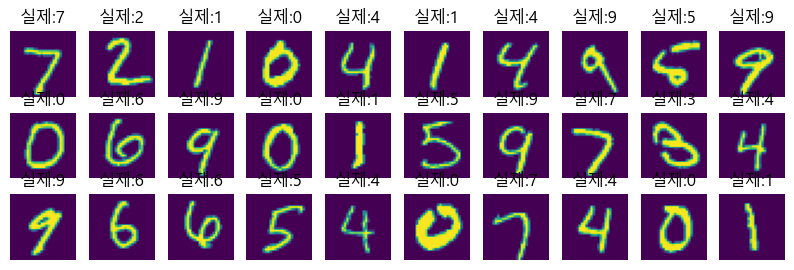

In [4]:
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize']=[plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
# axes[0, 0].imshow(X_test[0].reshape(width, height))
# axes[0, 0].axis("off")
# title = "실제:{}".format(y_test[0])
# axes[0, 0].set_title(title)
for i in range(plt_row*plt_col) :
    subax = axes[i//plt_col, i%plt_col] # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "실제:{}".format(y_test[i])
    subax.set_title(title)
# plt.tight_layout()

# 1. DNN

In [5]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수(28, 28) -> 784 1차원 -> 실수형 변환 -> 스케일 조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.3),
    Dense(units=10, activation='softmax')
])
# model.summary()
# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
model.fit(X_train, Y_train,
          epochs=50,
          validation_data=(X_val, Y_val),
          verbose=1)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2863 - accuracy: 0.9134 - val_loss: 0.1224 - val_accuracy: 0.9626
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1440 - accuracy: 0.9584 - val_loss: 0.1028 - val_accuracy: 0.9721
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1150 - accuracy: 0.9662 - val_loss: 0.0888 - val_accuracy: 0.9739
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0990 - accuracy: 0.9716 - val_loss: 0.0793 - val_accuracy: 0.9783
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0891 - accuracy: 0.9742 - val_loss: 0.0815 - val_accuracy: 0.9780
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0781 - accuracy: 0.9771 - val_loss: 0.0798 - val_accuracy: 0.9780
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.0812 - val_accuracy:

In [6]:
model.save('mnist.dnn.h5')

In [7]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9840


[0.16007576882839203, 0.984000027179718]

In [8]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print("실제값 :",y_test)
print("실제값 :", np.argmax(Y_test, axis=1))
yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 2ms/step


array([[ 972,    1,    1,    0,    1,    1,    2,    1,    1,    0],
       [   0, 1126,    3,    1,    0,    0,    2,    0,    3,    0],
       [   3,    0, 1009,    2,    1,    0,    1,    6,   10,    0],
       [   0,    0,    1, 1000,    0,    1,    0,    4,    0,    4],
       [   2,    2,    1,    0,  957,    0,    6,    4,    1,    9],
       [   2,    0,    0,   11,    0,  872,    3,    1,    2,    1],
       [   3,    2,    0,    0,    1,    1,  949,    0,    2,    0],
       [   2,    3,    5,    1,    0,    0,    0, 1010,    2,    5],
       [   1,    1,    1,    2,    2,    2,    0,    3,  960,    2],
       [   1,    3,    1,    5,    7,    1,    1,    4,    1,  985]],
      dtype=int64)

In [9]:
# 실제값과 예츠값이 다른 갯수(방법 1)
cnt = 0
for i, row in enumerate(cmatrix) :
    for j, data in enumerate(row) :
        if i!=j :
            cnt += data
print('예측이 틀린 갯수 : ', cnt)

예측이 틀린 갯수 :  160


In [10]:
# 실제값과 예측값이 다른 갯수(방법 2)
cnt = 0
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)


예측이 틀린 갯수 :  160


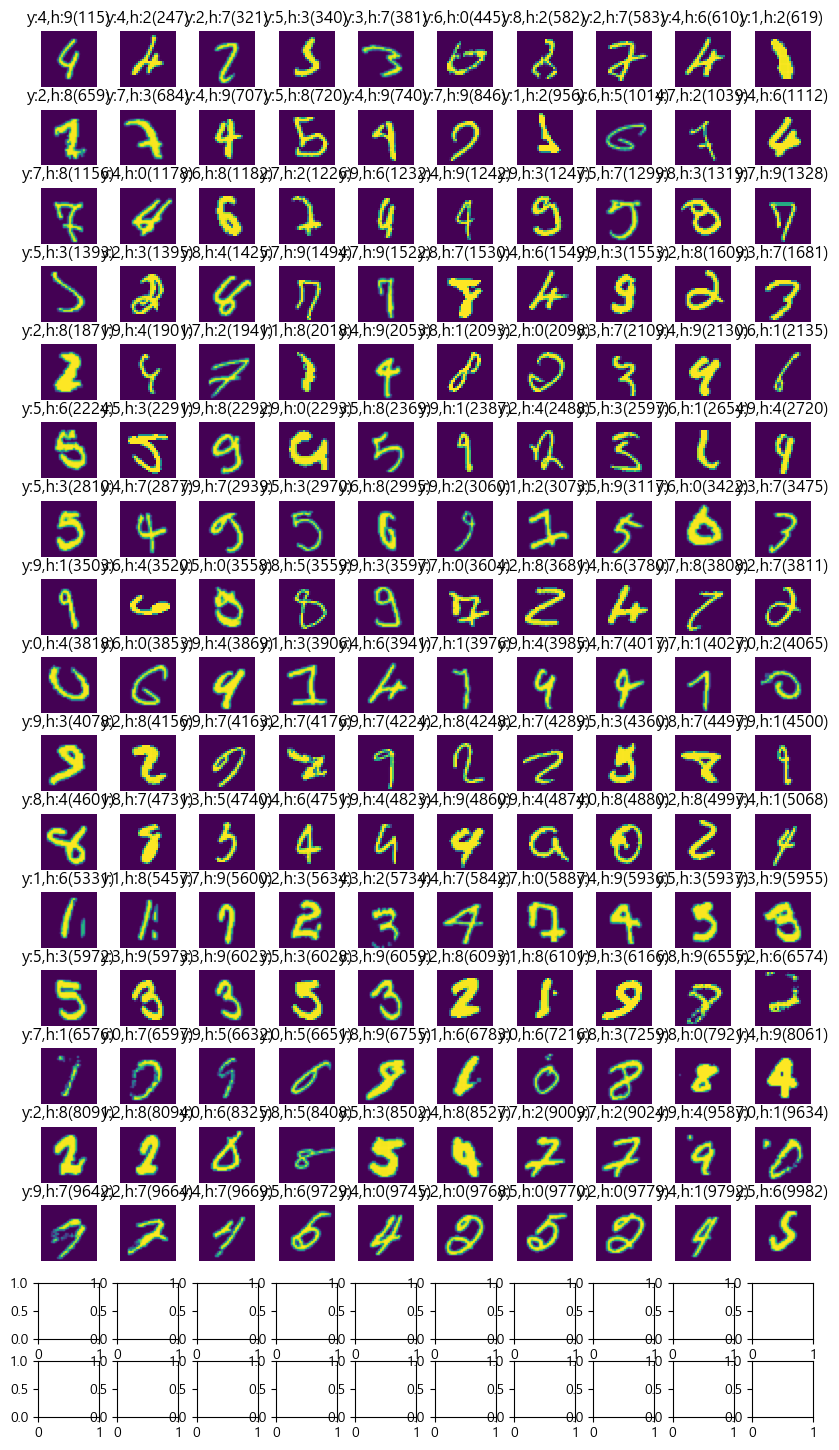

In [11]:
# CNN을 사용하여 예측이 틀린 데이터 출력(yhat과 y_test가 다른 것들 175개)
plt_row = 18
plt_col = 10
plt.rcParams['figure.figsize']=[plt_col, plt_row]
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0 # yhat 과 y_test의 index -> yhat[i], y_test[i]를 비교
cnt=0 # 이미지 출력 횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col) :
    if yhat[i] == y_test[i] :
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y:{},h:{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가
# plt.tight_layout()

# 2. CNN(컨볼루션 레이어 포함) -  6장 교안 p31

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils    import to_categorical
from tensorflow.keras.models   import Sequential, save_model, load_model
from tensorflow.keras.layers   import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [13]:
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28,28) => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width, height).astype('float32')/255.0
X_val = X_val.reshape(-1, width, height).astype('float32')/255.0
X_test = X_test.reshape(-1, width, height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((50000, 28, 28),
 (50000, 10),
 (10000, 28, 28),
 (10000, 10),
 (10000, 28, 28),
 (10000, 10))

In [14]:
# 2. 모델 생성
model = Sequential()
model.add(Conv2D(filters=32, # 필터 수
                 kernel_size=3, # 필터사이즈(3,3)
                 padding='same', # zero-padding을 하면 출력사이즈도 동일
                 input_shape=(width, height, 1), # 입력채널 1개, 필터32 -> 28*28*32
                 activation='relu'
                 ))
model.add(MaxPool2D(pool_size=(2,2))) # -> 14*14*32
model.add(Dropout(0.1))
model.add(Conv2D(64,(3,3), activation='relu')) # => ((14-3+1)*(14-3+1)*32)*64
model.add(MaxPool2D(pool_size=(2,2))) # => 6*6
model.add(Dropout(0.25))
model.add(Flatten()) # 입력을 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()
# 320 -> (3x3필터가 weight 9 + 1(bias))*32 개 필터
# 18,496 => ((3*3필터가 weight 3*3*32) + 1(bias) ) * 64개 필터

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [15]:
%%time
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
earlyStopping = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                 epochs=50,
                 validation_data=(X_val, Y_val),
                 verbose=1,
                 callbacks=[earlyStopping])

Epoch 1/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2368 - accuracy: 0.9264 - val_loss: 0.0500 - val_accuracy: 0.9850
Epoch 2/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0918 - accuracy: 0.9729 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0710 - accuracy: 0.9782 - val_loss: 0.0412 - val_accuracy: 0.9879
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0601 - accuracy: 0.9819 - val_loss: 0.0353 - val_accuracy: 0.9902
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 0.0402 - val_accuracy: 0.9902
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0328 - val_ac

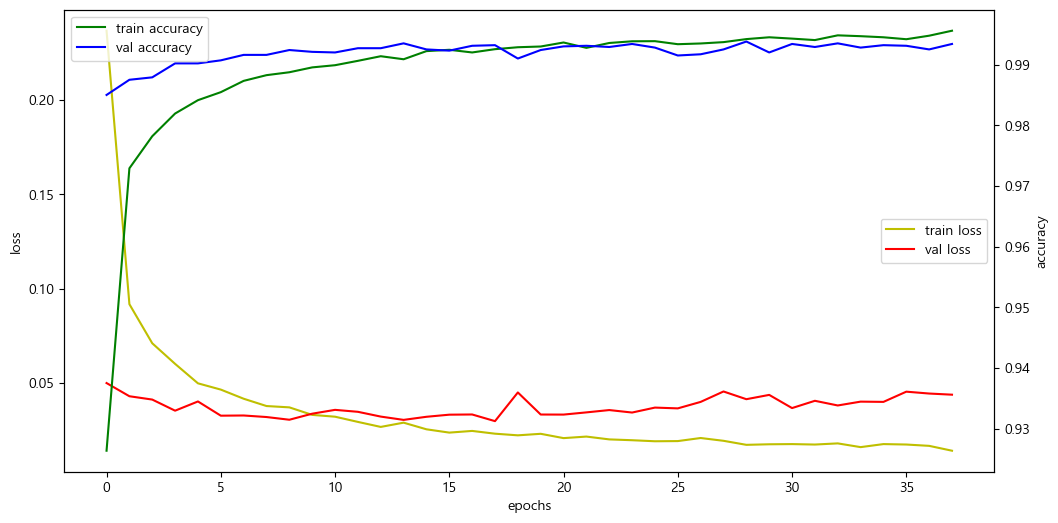

In [16]:
# 학습과정
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(loc='upper left')
plt.show()

In [17]:
# 모델 평가
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9933


[0.0288472231477499, 0.9933000206947327]

In [18]:
print('실제값 : ', y_test)
print('실제값 : ', Y_test.argmax(axis=1))
yhat = np.argmax(model.predict(X_test), axis=1)
print('예측값 : ',yhat)

실제값 :  [7 2 1 ... 4 5 6]
실제값 :  [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 2ms/step
예측값 :  [7 2 1 ... 4 5 6]


In [19]:
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1130,    1,    1,    0,    2,    0,    1,    0,    0],
       [   1,    0, 1028,    0,    0,    0,    0,    2,    1,    0],
       [   0,    0,    0, 1005,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  976,    0,    1,    0,    0,    5],
       [   2,    0,    0,    2,    0,  886,    2,    0,    0,    0],
       [   2,    2,    0,    0,    1,    1,  950,    0,    2,    0],
       [   0,    2,    7,    0,    2,    0,    0, 1012,    1,    4],
       [   1,    0,    1,    0,    0,    1,    0,    0,  970,    1],
       [   0,    0,    0,    0,    3,    3,    0,    2,    4,  997]],
      dtype=int64)

In [20]:
# 실제값과 예측값이 다른 갯수
cnt = 0
yhat=model.predict(X_test).argmax(axis=1)
for y, h in zip(y_test, yhat) :
    if y != h :
        cnt += 1
print('예측이 틀린 갯수 : ', cnt)

313/313 [==============================] - 1s 2ms/step
예측이 틀린 갯수 :  67


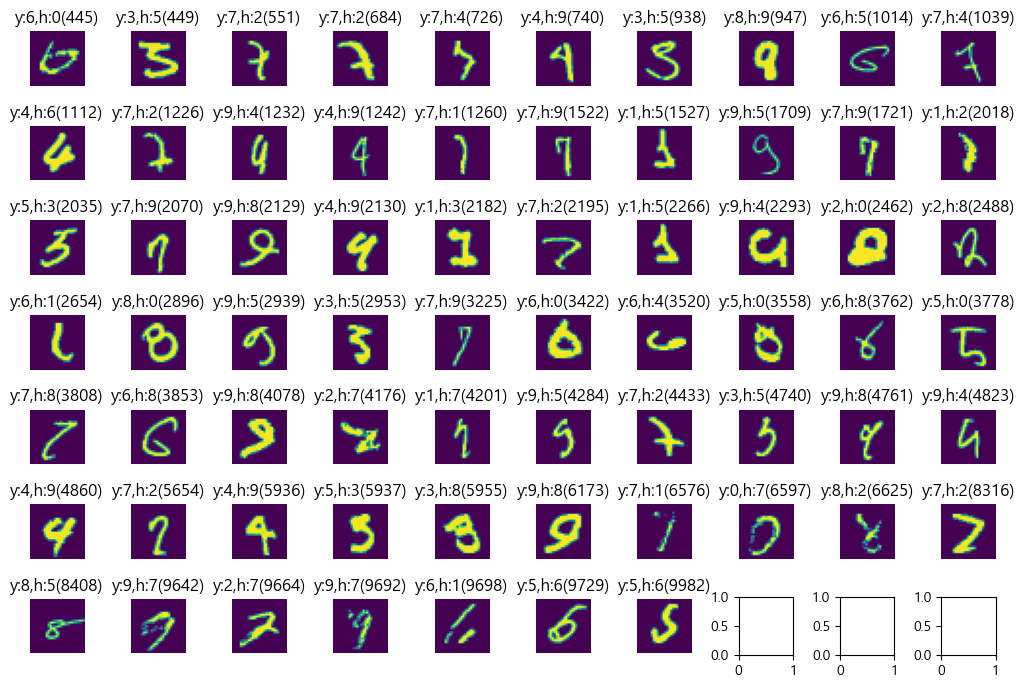

In [21]:
# CNN을 사용하여 예측이 틀린 데이터 출력(yhat과 y_test가 다른 것들 175개)
plt_row = 7
plt_col = 10
plt.rcParams['figure.figsize']=[plt_col, plt_row]
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0 # yhat 과 y_test의 index -> yhat[i], y_test[i]를 비교
cnt=0 # 이미지 출력 횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col) :
    if yhat[i] == y_test[i] :
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # // : 몫연산자, % : 나머지연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y:{},h:{}({})".format(y_test[i], yhat[i], i)
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가
plt.tight_layout()